# IMPORTING THE DEPENDENCIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


%matplotlib inline

# DATA COLLECTION & PROCESSING

In [3]:
# loading the Heart dataset
heart_df = pd.read_csv("../dataset/heart.csv")

In [4]:
# Printing the first 5 rows of the dataset
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Printing the last 5 rows of the dataset
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Number of rows and columns in the dataset
heart_df.shape

(303, 14)

In [7]:
# Statistical measures about the data
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Getting some info about the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Checking for missing values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Checking the distribution of Target Variable
heart_df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

In [11]:
# We use .unique() : to identify all distinct values in a column for data validation and cleaning
thal_values=heart_df['thal'].unique()
print(thal_values)
slope_values=heart_df['slope'].unique()
print(slope_values)
restecg_values=heart_df['restecg'].unique()
print(restecg_values)
chestpain_values=heart_df['cp'].unique()
print(chestpain_values)
ca_values=heart_df['ca'].unique()
print(ca_values)

[1 2 3 0]
[0 2 1]
[0 1 2]
[3 2 1 0]
[0 2 1 3 4]


Pivot Table checks :
How many patients(rows)exist for each thal value(0,1,2,3)

In [12]:
heart_df.pivot_table(values='target',index='thal',aggfunc='count')

,target
thal,
0,2
1,18
2,166
3,117


Pivot Table checks :
How many patients(rows)exist for each ca value(0,1,2,3,4)

In [13]:
heart_df.pivot_table(values='target',index='ca',aggfunc='count')

,target
ca,
0,175
1,65
2,38
3,20
4,5


thal = 0 is likely a misentered or invalid value, so we replace it with 3, the most common valid category, to ensure data consistency.
This helps the model learn from meaningful patterns, avoids confusion during training, and improves prediction accuracy.


In [14]:
heart_df['thal']=heart_df['thal'].replace(0,3)

We replace ca = 4 with 0 because 4 is either an outlier or an invalid value not typically expected in the ca (number of major vessels) feature.
Keeping it may confuse the model due to its rarity, while replacing it with 0 — the most frequent and valid value — improves data quality, balance, and model performance.

In [15]:
heart_df['ca']=heart_df['ca'].replace(4,0)

In [16]:
thal_values=heart_df['thal'].unique()
print(thal_values)
ca_values=heart_df['ca'].unique()
print(ca_values)

[1 2 3]
[0 2 1 3]


In [17]:
# it tells us for each value of target(0 or 1) what is the average
heart_df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.137681,2.565217
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.266667,2.139394


# Exploratory Data Analysis (EDA)

Target value count plot : shows the no. of patients with and without heart disease

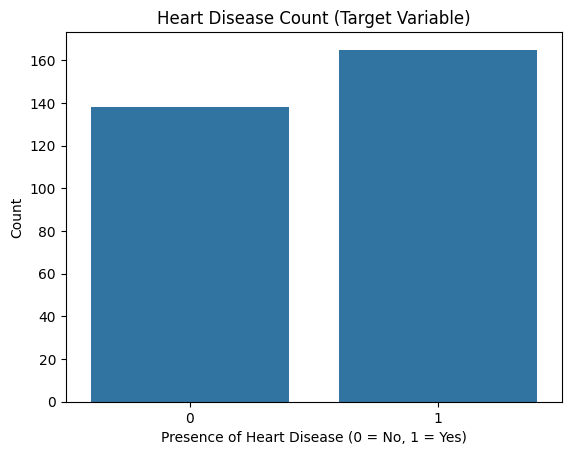

In [18]:
sns.countplot(x='target', data=heart_df)
plt.title('Heart Disease Count (Target Variable)')
plt.xlabel('Presence of Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Correlation Heatmap: helps identify relationships b/w features and with the target 

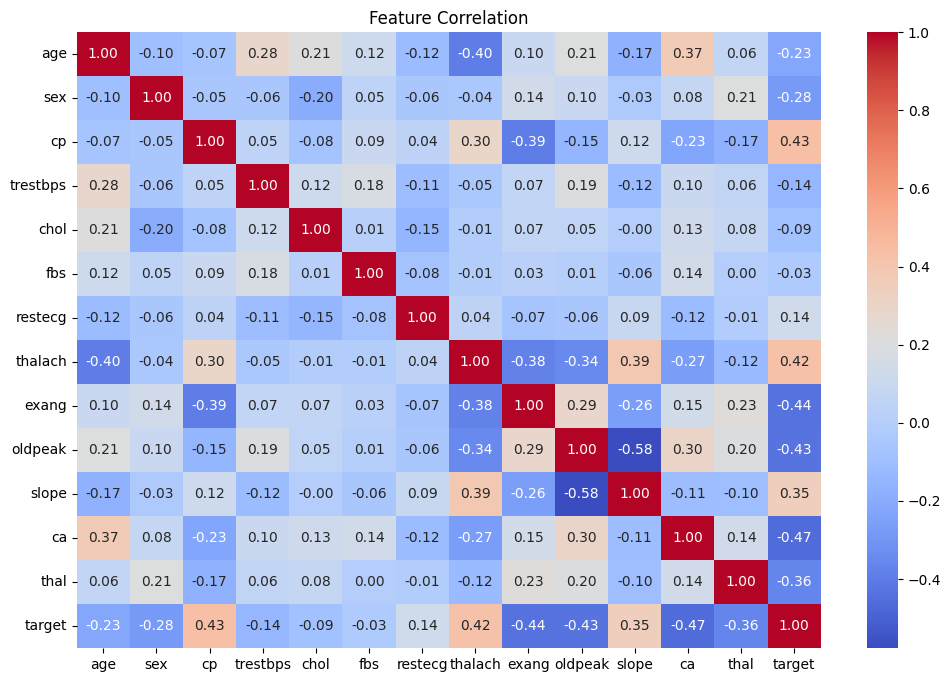

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

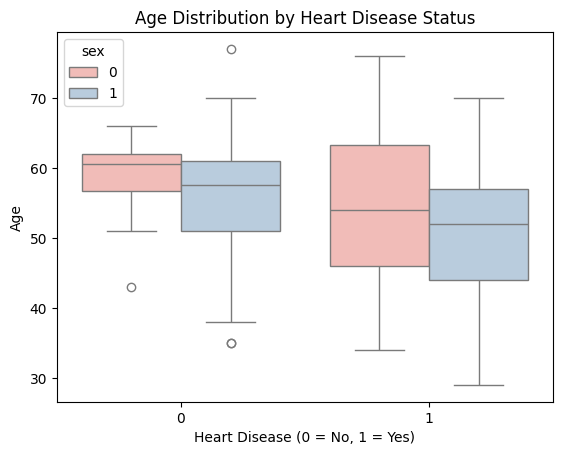

In [20]:
sns.boxplot(x='target', y='age',hue='sex', data=heart_df, palette='Pastel1')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

Pairplot : shows relationships b/w key features with hue as target

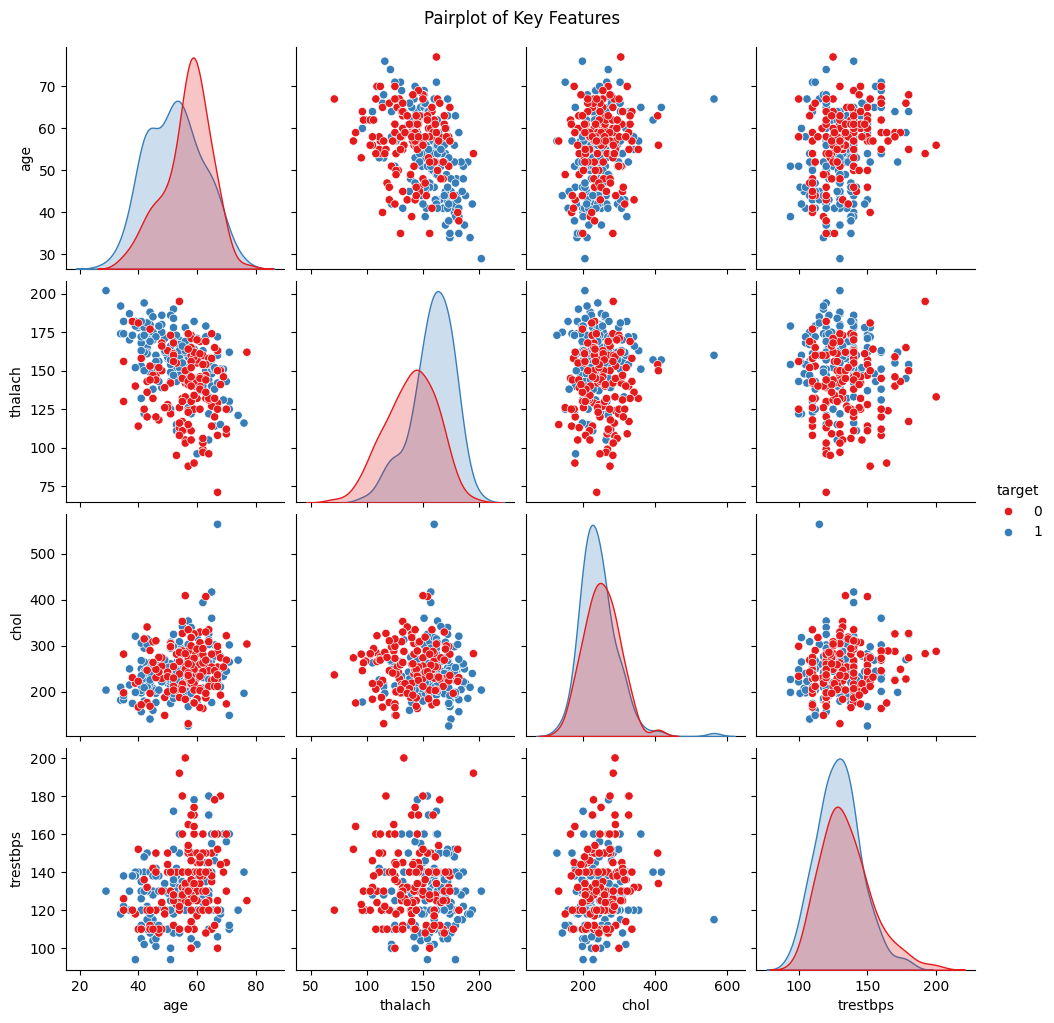

In [21]:
key_features = ['age', 'thalach', 'chol', 'trestbps', 'target']
sns.pairplot(heart_df[key_features], hue='target', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

Count Plot of chest pain type vs target

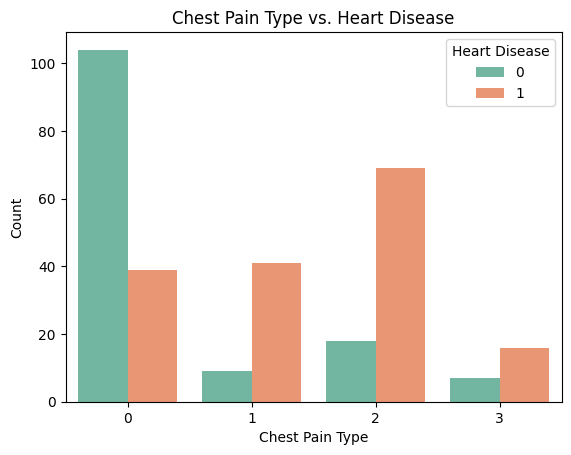

In [22]:
sns.countplot(x='cp', hue='target', data=heart_df, palette='Set2')
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

Histplot of max heart rate (thalach)

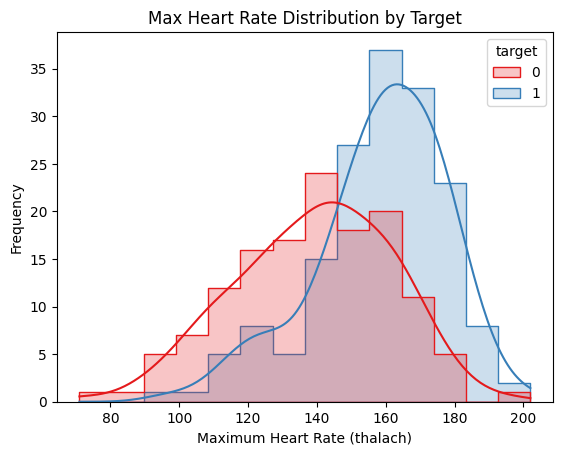

In [23]:
sns.histplot(data=heart_df, x='thalach', hue='target', kde=True, element="step", palette='Set1')
plt.title('Max Heart Rate Distribution by Target')
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('Frequency')
plt.show()

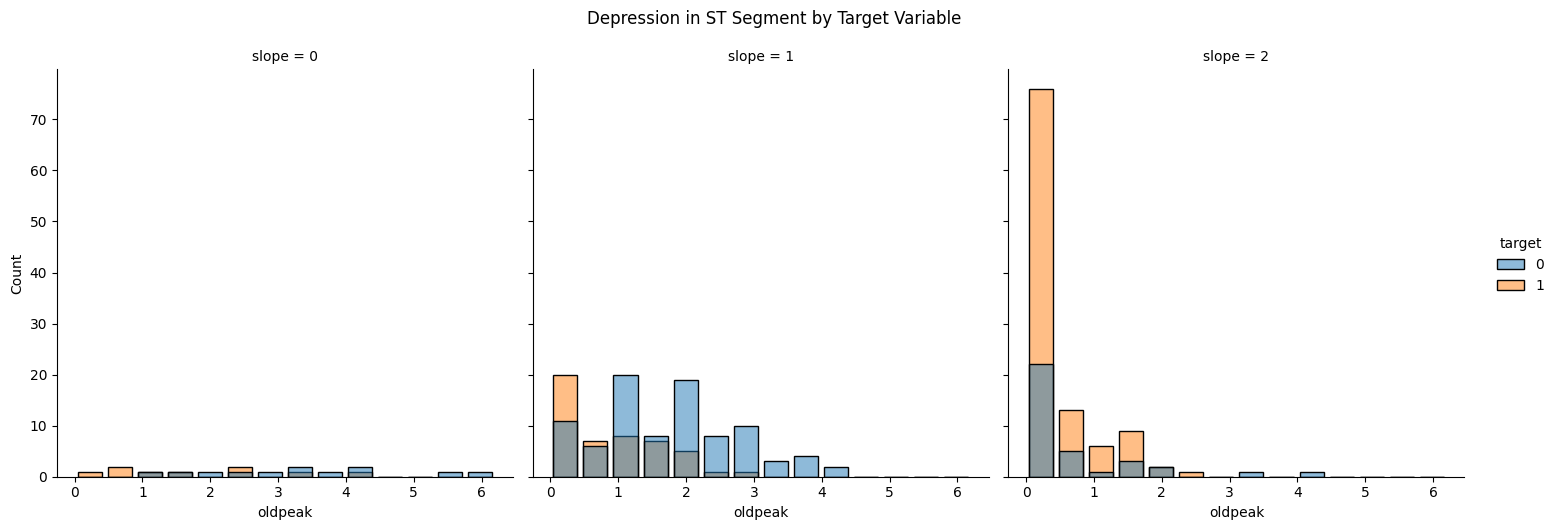

In [24]:
sns.displot(data=heart_df,x='oldpeak',shrink=0.8,col='slope',hue='target')
plt.suptitle('Depression in ST Segment by Target Variable',y=1.05)
plt.show()

Histogram showing the distribution of resting blood pressure categorized by presence of heart disease.

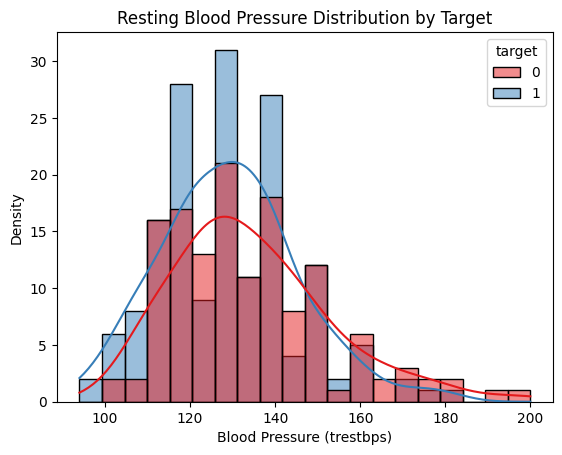

In [25]:
sns.histplot(data=heart_df, x='trestbps', hue='target', bins=20, kde=True,palette='Set1')
plt.title("Resting Blood Pressure Distribution by Target")
plt.xlabel("Blood Pressure (trestbps)")
plt.ylabel("Density")
plt.show()

Distribution of Heart Disease by Sex (Bar Plot)

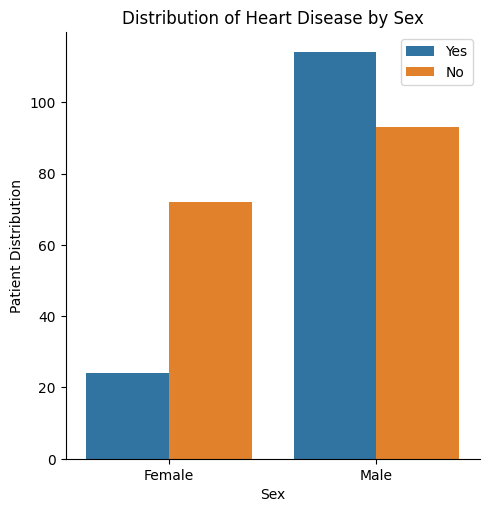

In [26]:
sns.catplot(x='sex',kind='count',data=heart_df,hue='target',legend=False)
plt.xticks([0,1],['Female','Male'])
plt.legend(['Yes','No'])
plt.title("Distribution of Heart Disease by Sex")
plt.xlabel("Sex")
plt.ylabel("Patient Distribution")
plt.show()

Maximum Heart Rate vs Target : Compare thalach(max. heart rate) across patients

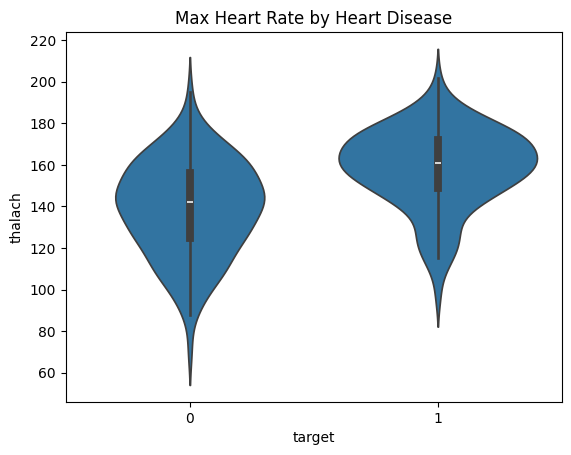

In [27]:
sns.violinplot(x='target',y='thalach',data=heart_df)
plt.title("Max Heart Rate by Heart Disease")
plt.show()

In [28]:
#separating the data and label
X = heart_df.drop(columns = 'target', axis = 1)
Y = heart_df['target']

In [29]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

PERFORMING TRAIN TEST SPLIT

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [32]:
Y_train.count()

np.int64(242)

In [33]:
Y_train.value_counts()

target
1    136
0    106
Name: count, dtype: int64

In [34]:
Y_test.value_counts()

target
0    32
1    29
Name: count, dtype: int64

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# TRAINING THE MODELS

1. Train Support Vector Classifier

In [36]:
classifier = SVC(kernel='linear')

In [37]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [38]:
Y_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)
training_data_accuracy

0.8636363636363636

In [39]:
Y_pred = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_pred, Y_test)
testing_data_accuracy

0.9016393442622951

In [40]:
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_test,Y_pred))
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test,Y_pred))

CONFUSION MATRIX:
[[27  5]
 [ 1 28]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



2. Train Random Forest Classifier

In [41]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [42]:
Y_train_pred = rf.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)
training_data_accuracy

1.0

In [43]:
Y_pred= rf.predict(X_test)
testing_data_accuracy = accuracy_score(Y_pred, Y_test)
testing_data_accuracy


0.8852459016393442

In [44]:
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_test,Y_pred))
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test,Y_pred))

CONFUSION MATRIX:
[[26  6]
 [ 1 28]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



C:\Users\hp\AppData\Local\Temp\ipykernel_11852\4226749089.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


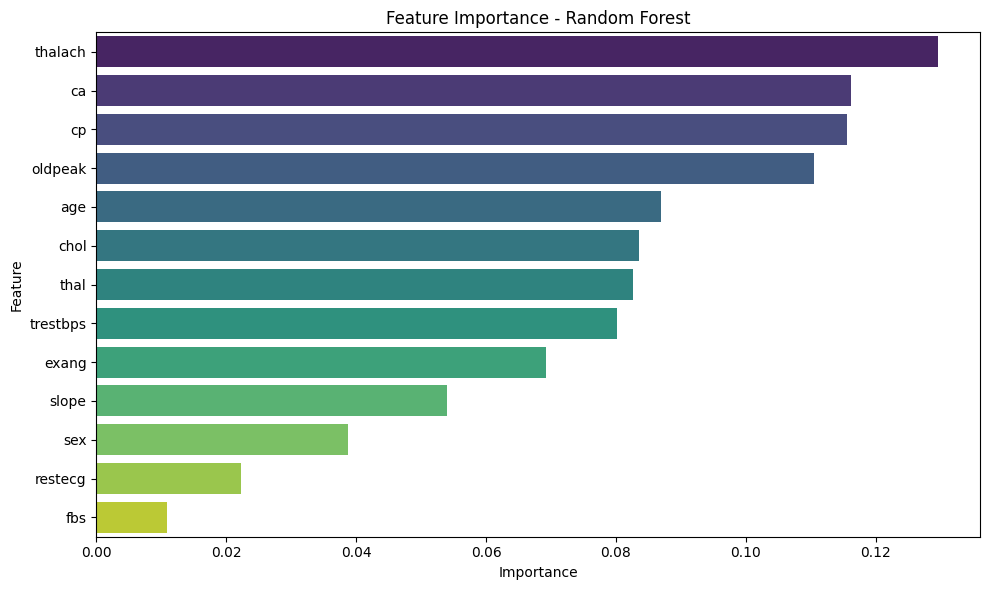

In [45]:
importances = rf.feature_importances_
features = heart_df.drop('target', axis=1).columns  # exclude target column

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features,'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

3. Train Logistic Regression Classifier

In [46]:
model = LogisticRegression()
model.fit(X_train,Y_train)

c:\Users\hp\Desktop\GURPREET ML MODEL\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
Y_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)
training_data_accuracy

0.859504132231405

In [48]:
Y_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_pred, Y_test)
testing_data_accuracy

0.9180327868852459

In [49]:
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_test,Y_pred))
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test,Y_pred))

CONFUSION MATRIX:
[[28  4]
 [ 1 28]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.88      0.97      0.92        29

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



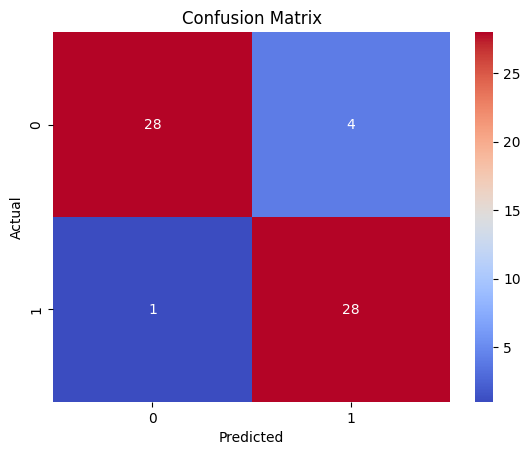

In [50]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

PLOT GRAPH TO COMPARE ACCURACIES OF DIFF. MODELS

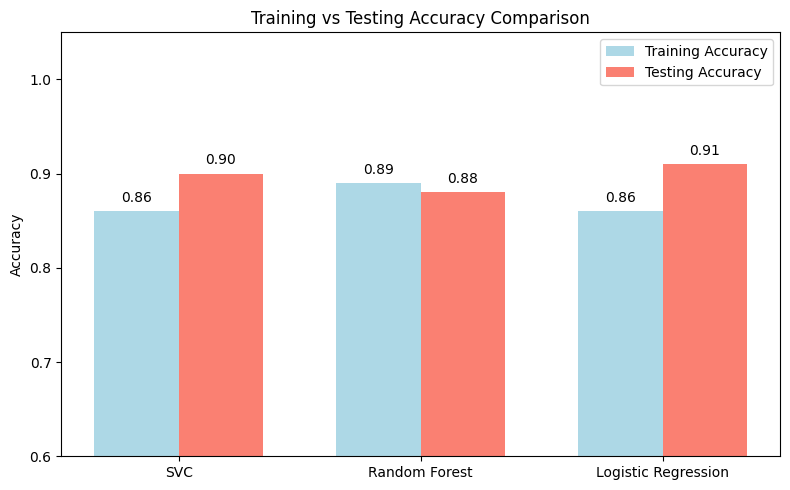

In [51]:
train_accuracies = [0.86, 0.89,0.86]# SVC, RF, Logistic
test_accuracies = [0.90, 0.88, 0.91]   # SVC, RF, Logistic

models = ['SVC', 'Random Forest', 'Logistic Regression']
x = range(len(models))

plt.figure(figsize=(8, 5))
bar_width = 0.35

plt.bar([i - bar_width/2 for i in x], train_accuracies, width=bar_width, label='Training Accuracy', color='lightblue')
plt.bar([i + bar_width/2 for i in x], test_accuracies, width=bar_width, label='Testing Accuracy', color='salmon')

plt.xticks(x, models)
plt.ylim(0.6, 1.05)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy Comparison')
plt.legend()

# Add values on top of bars
for i in x:
    plt.text(i - bar_width/2, train_accuracies[i] + 0.01, f'{train_accuracies[i]:.2f}', ha='center')
    plt.text(i + bar_width/2, test_accuracies[i] + 0.01, f'{test_accuracies[i]:.2f}', ha='center')

plt.tight_layout()
plt.show()

Based on the comparison of training and testing accuracy across SVC, Random Forest, and Logistic Regression, we selected Logistic Regression due to its highest testing accuracy, minimal overfitting, and stable performance.

# Making a Predictive System

In [59]:
input_data = (63,1,0,140,187,0,0,144,1,4,2,2,3)
input_data_as_numpy_array = np.asarray(input_data)
print (input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

prediction =model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person is not effected with heart disease")
else:
  print("The person is effected with heart disease")

[ 63   1   0 140 187   0   0 144   1   4   2   2   3]
[[ 63   1   0 140 187   0   0 144   1   4   2   2   3]]
[0]
The person is not effected with heart disease


c:\Users\hp\Desktop\GURPREET ML MODEL\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [53]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [54]:
import joblib

In [55]:
fileName_heart = "../saved_models/heart.joblib"

In [56]:
joblib.dump(model,fileName_heart)

['../saved_models/heart.joblib']

In [57]:
loaded_heart_model = joblib.load(fileName_heart)

In [58]:
input_data=np.array([[63,1,0,140,187,0,0,144,1,4,2,2,3]])

input_data_as_numpy_array = np.asarray(input_data)
print (input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

prediction = loaded_heart_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print("The person is not effected with heart disease")
else:
    print("The person is effected with heart disease")

[[ 63   1   0 140 187   0   0 144   1   4   2   2   3]]
[[ 63   1   0 140 187   0   0 144   1   4   2   2   3]]
[0]
The person is not effected with heart disease


c:\Users\hp\Desktop\GURPREET ML MODEL\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
